<a href="https://colab.research.google.com/github/sunmarknatecom/01_markcv/blob/master/text_classification_%EB%B9%88%EC%B9%B8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [ ]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report ,roc_curve, roc_auc_score
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

!gdown 1zb8o1KMYAzUCYNUnIomT0ROxYsRbLnyr
!gdown 188rfJHzI00--P0QfnPjkU8UavXILlbCf
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Downloading...
From: https://drive.google.com/uc?id=1zb8o1KMYAzUCYNUnIomT0ROxYsRbLnyr
To: /content/train.csv
100% 14.3M/14.3M [00:00<00:00, 30.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=188rfJHzI00--P0QfnPjkU8UavXILlbCf
To: /content/test.csv
100% 3.59M/3.59M [00:00<00:00, 69.9MB/s]


# Load Data

In [ ]:

# train.csv    test,csv
train_df=pd.read_csv(         )#빈칸
test_df=pd.read_csv(         )#빈칸

In [ ]:
train_df.head()

,label,text
0,4,Tissue changes around loose prostheses. A cani...
1,0,Neuropeptide Y and neuron-specific enolase lev...
2,1,"Sexually transmitted diseases of the colon, re..."
3,0,Lipolytic factors associated with murine and h...
4,2,Does carotid restenosis predict an increased r...


# word cloud 만들기

종양내과


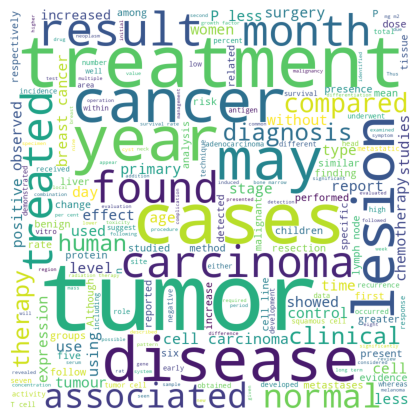

소화기내과


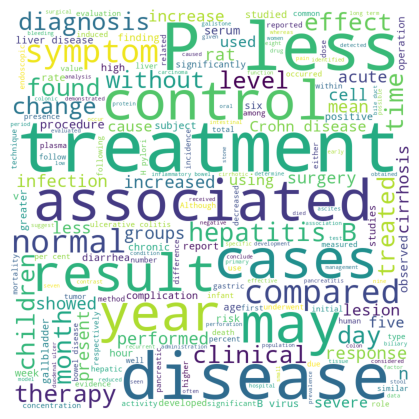

신경외과


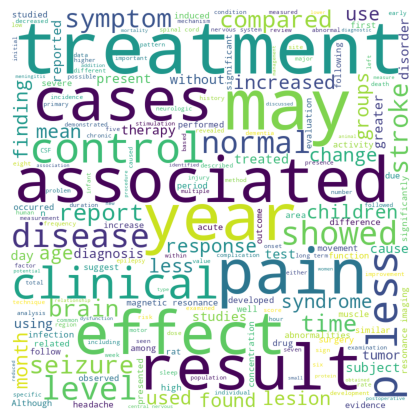

흉부외과


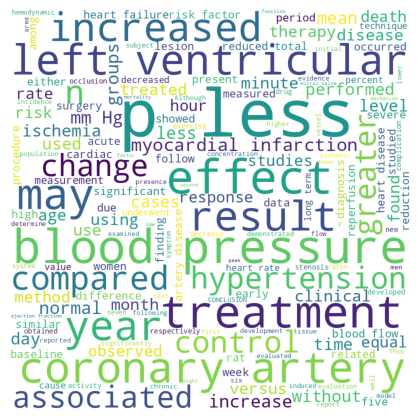

통합 내과


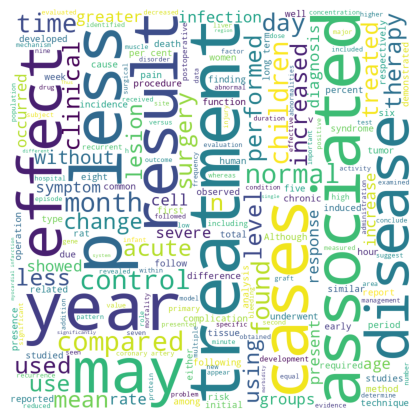

In [ ]:


stopwords=set(STOPWORDS) # 불용어 설정
labels=['종양내과','소화기내과','신경외과','흉부외과','통합 내과']

for i in range(5): #각 클래스 별 word cloud 생성

  temp=train_df[train_df['label']==i]['text']
  text=' '.join(temp)
  wordcloud = WordCloud(width = 800, height = 800,  #word cloud 생성
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)

  # word cloud를 표시합니다.
  plt.figure(figsize = (4, 4), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  print(labels[i])
  plt.show()


# Dataset 만들기

In [ ]:
class CustomDataset(Dataset):

    # bert는 고정된 크기의 입력을 받아야 하므로 max_len을 인자로 받음 (max_len보다 긴 문장은 자르고 짧은 문장은 padding)
    def __init__(self, dataframe, tokenizer, max_len):
        self.texts = dataframe.text
        self.labels = dataframe.label
        self.tokenizer = tokenizer # tokenizer는 텍스트를 작은 단위로 쪼개고 인덱스를 부여하는 역할을 함 (ex. '나는 학생입니다' -> '나는', '학생', '입니다' -> 1, 2, 3)
        self.max_len = max_len

    # __len__은 데이터셋의 총 샘플 수를 반환
    def __len__(self):
        return len(self.texts)

    # __getitem__은 인덱스를 입력받아 그에 맞는 데이터를 반환하는 역할을 함
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.      (    #빈칸
            text,
            truncation=       , # max_len보다 긴 문장은 자르기  #빈칸
            padding='max_length', # max_len보다 짧은 문장은 padding
            max_length=self.max_len, # 문장 최대 길이
            return_tensors='pt' # 파이토치 텐서 형태로 반환
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),  # input_ids는 bert의 토큰 인덱스
            'attention_mask': encoding['attention_mask'].flatten(), # attention_mask는 실제 단어와 padding에 대한 마스크
            'label': torch.tensor(label, dtype=torch.long)
        }




# Train Function

In [ ]:

# 모델 학습
def train(model,criterion, train_dataloader, optimizer,epoch):


    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # GPU 사용할 수 있으면 사용하고 아니면 CPU 사용
    model.to(device) # 모델을 GPU로 올림

    all_labels = [] # 실제 라벨을 담을 리스트
    all_preds = [] # 예측 라벨을 담을 리스트

    # 모델을 학습 모드로 설정
    model.train()
    total_loss = 0

    # data loader에서 배치만큼 반복하여 가져옴
    for batch in train_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)


                         # gradient 초기화       #빈칸
        outputs = model(input_ids, attention_mask=attention_mask) # 모델의 출력값
        predictions = torch.argmax(outputs.logits, dim=1) # 모델의 출력값에서 가장 큰 값의 인덱스를 예측값으로 설정
        loss =                         # loss 계산  #빈칸
                     # gradient 계산         #빈칸
                        # 파라미터 업데이트     #빈칸

        total_loss += loss.item() # loss를 더함
        all_labels.extend(labels.cpu().numpy()) # 실제 라벨을 리스트에 추가
        all_preds.extend(predictions.cpu().numpy()) # 예측 라벨을 리스트에 추가
        print(f'batch loss : {loss.item()}',end='\r')


    accuracy = accuracy_score(all_labels, all_preds) # 정확도 계산

    average_loss = total_loss / len(train_dataloader)   # 평균 loss 계산
    print(f'Epoch {epoch}, Train Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}')



# Valid Function

In [ ]:

# 평가
def valid(model, criterion,dataloader):


    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # GPU 사용할 수 있으면 사용하고 아니면 CPU 사용
    model.eval() # 모델을 평가 모드로 설정
    all_labels = [] # 실제 라벨을 담을 리스트
    all_preds = []  # 예측 라벨을 담을 리스트
    losses=[] # loss를 담을 리스트

    with              : # 평가 단계이므로 gradient 계산을 하지 않음     #빈칸
        for batch in dataloader: # data loader에서 배치만큼 반복하여 가져옴

            # GPU 사용할 수 있으면 GPU로 데이터를 보냄
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask) # 모델의 출력값
            predictions = torch.argmax(outputs.logits, dim=1) # 모델의 출력값에서 가장 큰 값의 인덱스를 예측값으로 설정
            loss = criterion(outputs.logits, labels) # loss 계산

            all_labels.extend(labels.cpu().numpy()) # 실제 라벨을 리스트에 추가
            all_preds.extend(predictions.cpu().numpy()) # 예측 라벨을 리스트에 추가
            losses.append(loss.item()) # loss를 리스트에 추가

    accuracy = accuracy_score(all_labels, all_preds) # 정확도 계산
    print(f'Valid Loss: {np.mean(losses):.4f}, Accuracy: {accuracy:.4f}')
    return np.mean(losses)


# Test Function

In [ ]:

# Test
def test(model, criterion,dataloader):


    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # GPU 사용할 수 있으면 사용하고 아니면 CPU 사용
                   # 모델을 평가 모드로 설정    #빈칸
    all_labels = [] # 실제 라벨을 담을 리스트
    all_preds = []  # 예측 라벨을 담을 리스트
    all_outputs=[]
    losses=[] # loss를 담을 리스트
    with torch.no_grad(): # 평가 단계이므로 gradient 계산을 하지 않음
        for batch in dataloader: # data loader에서 배치만큼 반복하여 가져옴

            # GPU 사용할 수 있으면 GPU로 데이터를 보냄
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask) # 모델의 출력값
            predictions = torch.argmax(outputs.logits, dim=1) # 모델의 출력값에서 가장 큰 값의 인덱스를 예측값으로 설정
            loss = criterion(outputs.logits, labels) # loss 계산

            all_labels.extend(labels.cpu().numpy()) # 실제 라벨을 리스트에 추가
            all_preds.extend(predictions.cpu().numpy()) # 예측 라벨을 리스트에 추가
            all_outputs.extend(outputs.logits.cpu().numpy()) # 예측 확률을 리스트에 추가
            losses.append(loss.item()) # loss를 리스트에 추가

    accuracy = accuracy_score(all_labels, all_preds) # 정확도 계산
    print(f'Test Result : ')
    labels=['Neoplasms','Digestive system diseases','Nervous system diseases','Cardiovascular diseases','General pathological conditions'	]

    print(classification_report(all_labels,all_preds,target_names=labels))




    all_labels=np.array(all_labels)
    all_outputs=np.array(all_outputs)


    plt.figure(figsize=(15,5))
    plt.plot([0,1],[0,1],label='STR')

    # roc curve 그리기
    for i in range(5):
      target_labels=[1 if x==i else 0  for x in all_labels ]
      target_preds=all_outputs[:,i]

      fprs,tprs,thresholds=              (target_labels,target_preds)                 #빈칸

      plt.plot(fprs, tprs,label=f'{labels[i]} : {roc_auc_score(target_labels, target_preds):0.4}') # auc score 구하기


      plt.xlabel('FP Rate')
      plt.ylabel('TP Rate')

    plt.legend()
    plt.show()


# Train Valid 분할

In [ ]:

# 훈련 및 검증 데이터로 분할 (train 데이터의 20%를 valid 데이터로 사용)
train_df ,valid_df = train_test_split(
   train_df,            , random_state=53879, stratify=train_df.label.values     #빈칸
)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)




# dataloader 생성 및 pretrained tokenizer load

In [ ]:

# BERT 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

batch_size=16
# 데이터셋 및 데이터로더 생성
max_len = 512
train_dataset = CustomDataset(train_df, tokenizer, max_len)
val_dataset = CustomDataset(valid_df , tokenizer, max_len)
test_dataset = CustomDataset(test_df , tokenizer, max_len)


train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

# pretrained bertmodel load 및 train parameter 설정

In [ ]:

# BERT 분류 모델 로드
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)



# 옵티마이저 및 에폭 설정
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

epochs = 30

criterion=                            #빈칸

best_loss=np.Inf
best_epoch=0


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# 모델 학습

In [ ]:

for epoch in range(epochs): # 에폭만큼 반복
    train(model, criterion,train_dataloader, optimizer, epoch+1)
    val_loss=valid(model,criterion, val_dataloader)

    torch.save(model.state_dict(), f'epoch_{epoch+1}.pt') # 모델 저장
    if val_loss<best_loss: # valid 데이터의 loss가 가장 적은 모델을 저장
        best_loss=val_loss
        best_epoch=epoch+1
        torch.save(model.state_dict(), f'best_model_{best_epoch}.pt')
        print('best model saved')




Epoch 1, Train Loss: 1.0375, Accuracy: 0.5798
Valid Loss: 0.9717, Accuracy: 0.6004
best model saved


KeyboardInterrupt: ignored

# 모델 평가

Downloading...
From: https://drive.google.com/uc?id=13B7aW0fstmYzqHfWeOovHYKk_n8fQQKK
To: /content/trained_model.pt
100% 438M/438M [00:04<00:00, 88.8MB/s]
Test Result : 
                                 precision    recall  f1-score   support

                      Neoplasms       0.80      0.86      0.83      2036
      Digestive system diseases       0.72      0.66      0.69       961
        Nervous system diseases       0.73      0.72      0.73      1204
        Cardiovascular diseases       0.78      0.85      0.81      1954
General pathological conditions       0.73      0.68      0.71      3085

                       accuracy                           0.76      9240
                      macro avg       0.75      0.75      0.75      9240
                   weighted avg       0.76      0.76      0.76      9240



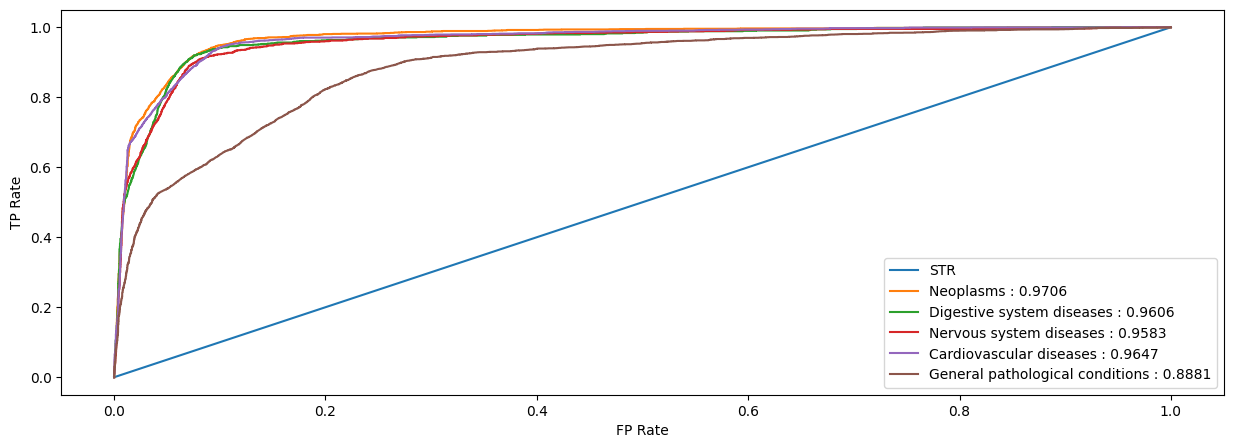

In [ ]:
!gdown 13B7aW0fstmYzqHfWeOovHYKk_n8fQQKK
model.load_state_dict(torch.load('trained_model.pt',map_location=device)) # 가장 적은 loss를 보인 모델을 불러옴.

test(model,criterion, train_dataloader)

In [ ]:
def inference(model,text):

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model.load_state_dict(torch.load('trained_model.pt',map_location=device)) #pretrained model load

  model.to(device)
  softmax=nn.Softmax(dim=1)
  department=['종양내과','소화기내과','신경외과','흉부외과','통합내과']

  # data 전처리
  encoding = tokenizer(
            text,
            truncation=True, # max_len보다 긴 문장은 자르기
            padding='max_length', # max_len보다 짧은 문장은 padding
            max_length=512, # 문장 최대 길이
            return_tensors='pt' # 파이토치 텐서 형태로 반환
        )
  # inference
  result=model(encoding['input_ids'].to(device),attention_mask=encoding['attention_mask'].to(device))
  result=softmax(result.logits)[0].detach().cpu().numpy()
  print(f'''
  {department[0]} : {result[0]:0.3}
  {department[1]} : {result[1]:0.3}
  {department[2]} : {result[2]:0.3}
  {department[3]} : {result[3]:0.3}
  {department[4]} : {result[4]:0.3}

  텍스트로 확인한 결과 {department[np.argmax(result)]} 진료를 보셔야 합니다.
  ''')

In [ ]:
label,text=test_df.iloc[34]

In [ ]:
print(f'label : {label}')

print(f'text : {text}')

label : 4
text : Combined vesicovaginal-ureterovaginal fistulas associated with a vaginal foreign body. A case is presented of vesicovaginal-ureterovaginal fistulas associated with a neglected vaginal foreign body. The patient complained of a foul-smelling vaginal discharge and was found to have a 4-cm hard vaginal mass on examination. Urinary incontinence developed subsequently. Examination under anesthesia was performed, and an aerosol deodorant cap was operatively removed from her posterior vagina/perirectal space. Subsequent work-up demonstrated the presence of both a vesicovaginal fistula and a right ureterovaginal fistula. The patient underwent a combined vaginal repair of the vesicovaginal fistula and abdominal ureteroneocystostomy. The frequency, types, etiology, and treatment of genitourinary fistulas are reviewed with particular attention to those associated with a vaginal foreign body. 


In [ ]:
inference(model,text)


  종양내과 : 0.0702
  소화기내과 : 0.00279
  신경외과 : 0.00164
  흉부외과 : 0.00011
  통합 내과 : 0.925

  텍스트로 확인한 결과 통합 내과 진료를 보셔야 합니다.
  
